In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
features=pd.read_csv('Features data set.csv')
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [3]:
stores=pd.read_csv('stores data-set.csv')
sales=pd.read_csv('sales data-set.csv')

In [4]:
features['Date'] = pd.to_datetime(features['Date'])
sales['Date'] = pd.to_datetime(sales['Date'])

In [5]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False


In [6]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
print(features.shape)
print(sales.shape)
print(stores.shape)

(8190, 12)
(421570, 5)
(45, 3)


In [8]:
df=pd.merge(sales,features, on=['Store','Date', 'IsHoliday'], how='inner')
df=pd.merge(df,stores, on=['Store'], how='inner')
df.isnull().sum()/len(df)*100

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
Type             0.000000
Size             0.000000
dtype: float64

In [9]:
df.to_csv('df.csv')             #

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(10), int64(3), object(1)
memory usage: 51.9+ MB


In [9]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-05-02,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-05-02,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-05-02,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-05-02,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [20]:
df['MarkDown5'].isna().sum()

270138

In [39]:
df['CPI']

0         211.096358
1         211.096358
2         211.096358
3         211.096358
4         211.096358
5         211.096358
6         211.096358
7         211.096358
8         211.096358
9         211.096358
10        211.096358
11        211.096358
12        211.096358
13        211.096358
14        211.096358
15        211.096358
16        211.096358
17        211.096358
18        211.096358
19        211.096358
20        211.096358
21        211.096358
22        211.096358
23        211.096358
24        211.096358
25        211.096358
26        211.096358
27        211.096358
28        211.096358
29        211.096358
             ...    
421540    192.308899
421541    192.308899
421542    192.308899
421543    192.308899
421544    192.308899
421545    192.308899
421546    192.308899
421547    192.308899
421548    192.308899
421549    192.308899
421550    192.308899
421551    192.308899
421552    192.308899
421553    192.308899
421554    192.308899
421555    192.308899
421556    192

In [11]:
le=LabelEncoder()
df['IsHoliday']=le.fit_transform(df['IsHoliday'])
df['Type']=le.fit_transform(df['Type'])
df['Temperature'] = (df['Temperature']- 32) * 5./9.
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,0,5.727778,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315
1,1,2,2010-05-02,50605.27,0,5.727778,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315
2,1,3,2010-05-02,13740.12,0,5.727778,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315
3,1,4,2010-05-02,39954.04,0,5.727778,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315
4,1,5,2010-05-02,32229.38,0,5.727778,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315
5,1,6,2010-05-02,5749.03,0,5.727778,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315
6,1,7,2010-05-02,21084.08,0,5.727778,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315
7,1,8,2010-05-02,40129.01,0,5.727778,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315
8,1,9,2010-05-02,16930.99,0,5.727778,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315
9,1,10,2010-05-02,30721.50,0,5.727778,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315


In [12]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [13]:
df=df.fillna(0)
df['Temperature'] = (df['Temperature']- 32) * 5./9.
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,0,-14.595679,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315
1,1,2,2010-05-02,50605.27,0,-14.595679,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315
2,1,3,2010-05-02,13740.12,0,-14.595679,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315
3,1,4,2010-05-02,39954.04,0,-14.595679,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315
4,1,5,2010-05-02,32229.38,0,-14.595679,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315
5,1,6,2010-05-02,5749.03,0,-14.595679,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315
6,1,7,2010-05-02,21084.08,0,-14.595679,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315
7,1,8,2010-05-02,40129.01,0,-14.595679,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315
8,1,9,2010-05-02,16930.99,0,-14.595679,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315
9,1,10,2010-05-02,30721.50,0,-14.595679,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,151315


In [14]:
df.shape

(421570, 16)

In [15]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [16]:
df['Weekly_Sales']=df['Weekly_Sales'].abs()

In [17]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,0,-14.595679,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
1,1,2,2010-05-02,50605.27,0,-14.595679,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
2,1,3,2010-05-02,13740.12,0,-14.595679,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
3,1,4,2010-05-02,39954.04,0,-14.595679,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
4,1,5,2010-05-02,32229.38,0,-14.595679,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       421570 non-null float64
MarkDown2       421570 non-null float64
MarkDown3       421570 non-null float64
MarkDown4       421570 non-null float64
MarkDown5       421570 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null int32
Size            421570 non-null int64
dtypes: datetime64[ns](1), float64(10), int32(1), int64(4)
memory usage: 53.1 MB


In [19]:
df = df.reindex(
    columns=['Date', 'Store', 'Dept','Type', 'Size', 'MarkDown1',
             'MarkDown2', 'MarkDown3', 'MarkDown4','MarkDown5',
             'CPI','Temperature','Fuel_Price','Unemployment',
             'IsHoliday', 'Weekly_Sales'])

In [20]:
df.head()

,Date,Store,Dept,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Temperature,Fuel_Price,Unemployment,IsHoliday,Weekly_Sales
0,2010-05-02,1,1,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0,24924.50
1,2010-05-02,1,2,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0,50605.27
2,2010-05-02,1,3,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0,13740.12
3,2010-05-02,1,4,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0,39954.04
4,2010-05-02,1,5,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0,32229.38


In [21]:
m = df['Type'].value_counts()

In [22]:
m/m.sum()

0    0.511132
1    0.387824
2    0.101044
Name: Type, dtype: float64

In [34]:
df.corr()

,Store,Dept,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Temperature,Fuel_Price,Unemployment,IsHoliday,Weekly_Sales
Store,1.000000,0.024004,0.226410,-0.182881,-0.059844,-0.033829,-0.020331,-0.042724,-0.012452,-0.211088,-0.050097,0.065290,0.208552,-0.000548,-0.085198
Dept,0.024004,1.000000,0.003708,-0.002966,0.001494,0.000587,0.001475,0.001937,0.002668,-0.007477,0.004437,0.003572,0.007837,0.000916,0.148035
Type,0.226410,0.003708,1.000000,-0.811593,-0.126345,-0.055318,-0.024013,-0.089770,-0.130125,-0.065812,0.042981,0.029687,0.148720,-0.000798,-0.182245
Size,-0.182881,-0.002966,-0.811593,1.000000,0.169788,0.078372,0.033641,0.127334,0.153011,-0.003314,-0.058313,0.003361,-0.068238,0.000593,0.243833
MarkDown1,-0.059844,0.001494,-0.126345,0.169788,1.000000,0.174868,-0.014411,0.838904,0.415050,0.010915,-0.026415,0.297056,-0.105168,-0.003521,0.047171
MarkDown2,-0.033829,0.000587,-0.055318,0.078372,0.174868,1.000000,-0.006080,0.113250,0.131735,-0.003554,-0.179672,0.029153,-0.041427,0.207604,0.020720
MarkDown3,-0.020331,0.001475,-0.024013,0.033641,-0.014411,-0.006080,1.000000,-0.012020,0.042471,-0.005839,-0.056026,0.018615,-0.018078,0.266471,0.038561
MarkDown4,-0.042724,0.001937,-0.089770,0.127334,0.838904,0.113250,-0.012020,1.000000,0.303370,-0.002047,-0.050281,0.166622,-0.076513,0.011565,0.037467
MarkDown5,-0.012452,0.002668,-0.130125,0.153011,0.415050,0.131735,0.042471,0.303370,1.000000,0.067906,-0.014752,0.215420,-0.120406,-0.015235,0.050464
CPI,-0.211088,-0.007477,-0.065812,-0.003314,0.010915,-0.003554,-0.005839,-0.002047,0.067906,1.000000,0.182112,-0.164210,-0.299953,-0.001944,-0.020924


# Move Towards univariate analysis

In [35]:
import seaborn as sns
from matplotlib import pyplot as plt

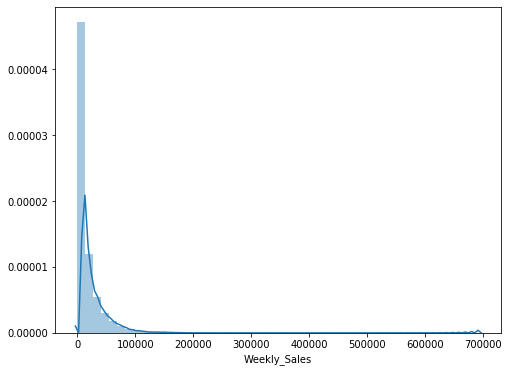

In [36]:
plt.figure(figsize=(8,6))
sns.distplot(df['Weekly_Sales'])

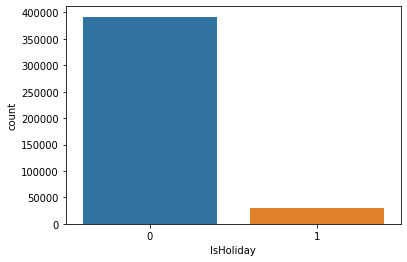

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(df['IsHoliday'])

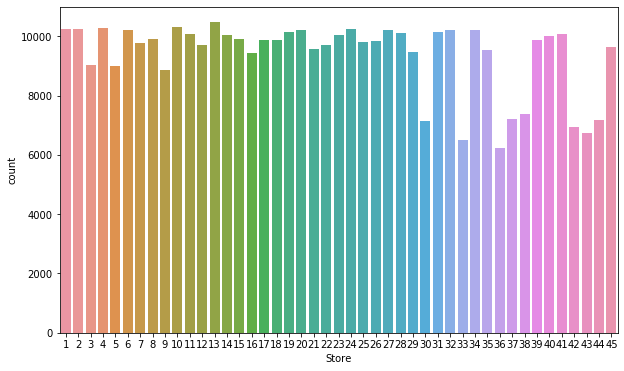

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(df['Store'])

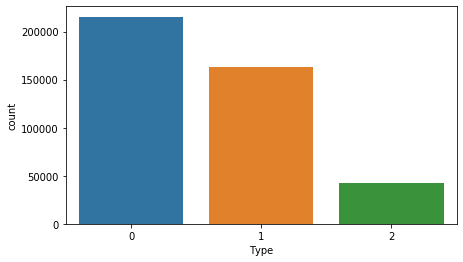

In [39]:
plt.figure(figsize=(7,4))
sns.countplot(df['Type'])


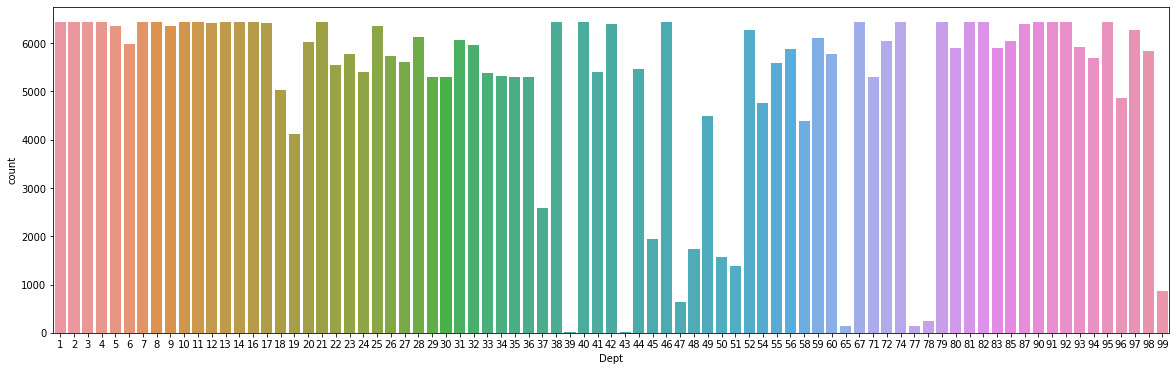

In [40]:
plt.figure(figsize=(20,6))
sns.countplot(df['Dept'])

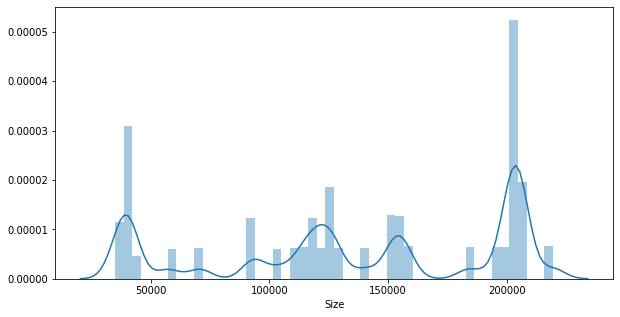

In [41]:
plt.figure(figsize=(10,5))
sns.distplot(df['Size'])

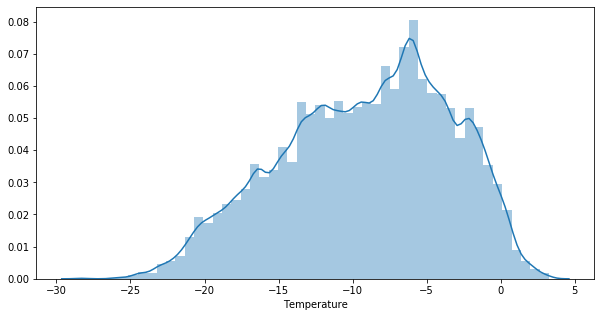

In [42]:
plt.figure(figsize=(10,5))
sns.distplot(df['Temperature'])

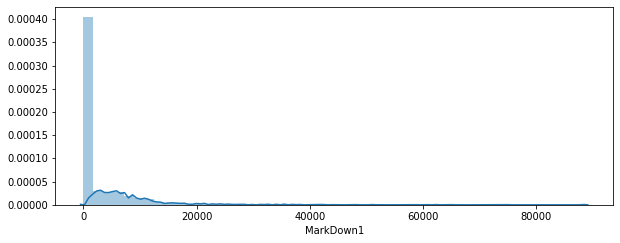

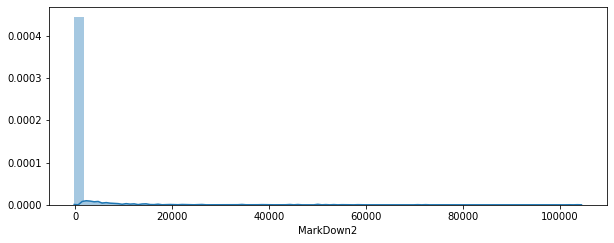

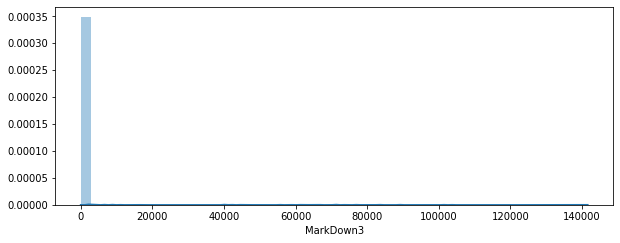

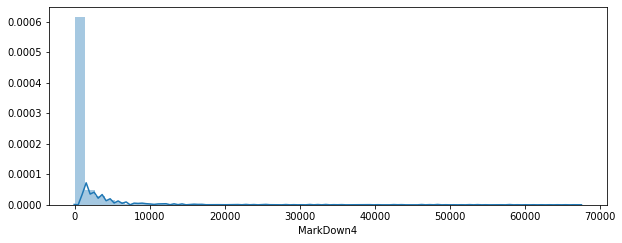

In [43]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
a = sns.distplot(df['MarkDown1'])
plt.show(a)
plt.figure(figsize=(10,8))
plt.subplot(2,1,2)
b = sns.distplot(df['MarkDown2'])
plt.show(b)
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
c = sns.distplot(df['MarkDown3'])
plt.show(c)
plt.figure(figsize=(10,8))
plt.subplot(2,1,2)
d = sns.distplot(df['MarkDown4'])
plt.show(d)

# Move Towards Bivariate Analysis

# Weekly_Sales vs Store

In [44]:
cd/Users/Sangita/Desktop/Retail_Data_Analytics/Bivariaent analysis

[WinError 3] The system cannot find the path specified: '/Users/Sangita/Desktop/Retail_Data_Analytics/Bivariaent analysis'
C:\Users\User\Downloads\capstone project group 13


In [ ]:
from IPython.display import Image
Image(filename='Weekly_Sales vs Store.png') 

# Weekly_Sales vs Store

In [ ]:
Image(filename='Dept_wise Weekly_Sales.png') 

# Dept-Low Weekly_Sales

In [ ]:
Image(filename='Dept-Low Weekly_Sales.png') 

# Temperature Vs Weekly_Sales 

In [ ]:
Image(filename='Temp vs Weekly_Sales.png') 

# Store,Size,Weekly_Sales

In [ ]:
Image(filename='Store,Size,Weekly_Sales.png')

# MarkDown1 Vs Weekly_Sales

In [ ]:
Image(filename='MarkDown1.png')

# MarkDown2 Vs Weekly_Sales

In [ ]:
Image(filename='MarkDown2.png')

# MarkDown3 Vs Weekly_Sales

In [ ]:
Image(filename='MarkDown3.png')

# MarkDown4 Vs Weekly_Sales

In [ ]:
Image(filename='MarkDown4.png')

# MarkDown5 Vs Weekly_Sales

In [ ]:
Image(filename='MarkDown5.png')

# CPI vs Weekly_Sales

In [ ]:
Image(filename='CPI vs Weekly_Sales.png')

# Type vs Weekly_Sales

In [ ]:
Image(filename='Type vs Weekly_Sales.png')

# Fuel_Price vs Weekly_Sales

In [ ]:
Image(filename='Fuel_Price vs Weekly_Sales .png')

# Date vs Weekly_Sales

In [ ]:
Image(filename='Date vs Weekly_Sales.png')

# IsHoliday vs Weekly_Sales

In [ ]:
Image(filename='IsHoliday vs Weekly_Sales.png')

In [46]:
import statsmodels.api as sm

In [47]:
x=df.drop(['Date',"Weekly_Sales"],1)
y=df['Weekly_Sales']

In [48]:
x_constant=sm.add_constant(x)
x_constant.head()

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,Store,Dept,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Temperature,Fuel_Price,Unemployment,IsHoliday
0,1.0,1,1,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0
1,1.0,1,2,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0
2,1.0,1,3,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0
3,1.0,1,4,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0
4,1.0,1,5,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0


In [49]:
model=sm.OLS(y,x_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     2873.
Date:                Sun, 10 Nov 2019   Prob (F-statistic):               0.00
Time:                        08:45:38   Log-Likelihood:            -4.8076e+06
No. Observations:              421570   AIC:                         9.615e+06
Df Residuals:                  421555   BIC:                         9.615e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6156.3488    463.632     13.279      0.000    5247.645    7065.053
Store          -93.6499      2.779    -33.693      0.000     -99.098     -88.202
Dept           111.4336      1.096    101.635      0.000     109.285     113.583
Type          1900.6745     87.770     21.655      0.000    1728.648    2072.701
Size             0.1029      0.001    107.797      0.000       0.101       0.105
MarkDown1       -0.0138      0.011     -1.231      0.218      -0.036       0.008
MarkDown2        0.0006      0.007      0.082      0.935      -0.013       0.014
MarkDown3        0.1127      0.006     17.851      0.000       0.100       0.125
MarkDown4        0.0277      0.016      1.725      0.085      -0.004       0.059
MarkDown5        0.0923      0.009     10.328      0.000       0.075       0.110
CPI            -22.3637      0.957    -23.377      0.000     -24.239     -20.489
Temperature     87.1449      6.350     13.724      0.000      74.699      99.591
Fuel_Price    -650.7989     81.456     -7.990      0.000    -810.450    -491.148
Unemployment  -208.8738     19.686    -10.610      0.000    -247.458    -170.290
IsHoliday      695.1949    140.496      4.948      0.000     419.826     970.564
==============================================================================
Omnibus:                   296376.720   Durbin-Watson:                   1.317
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8777287.554
Skew:                           3.022   Prob(JB):                         0.00
Kurtosis:                      24.521   Cond. No.                     2.10e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
x=df.drop(['Weekly_Sales','Date'],1)
y=df['Weekly_Sales']

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

In [55]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)
y_pred=LR.predict(x_test)

In [56]:
LR.score(x_test,y_test)

0.08651793809348496

In [58]:
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)
mse=metrics.mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

14575.943217183796
472983398.64231753
21748.181501962816


In [59]:
Model=[]
Accuracy=[]
RMSE=[]

In [60]:
Model=['Linear Regression']
Accuracy=[LR.score(x_test,y_test)]
RMSE=[np.sqrt(metrics.mean_squared_error(y_test,y_pred))]

# Feature Selection

# VIF

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(x):
    thresh = 5
    output= pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    for i in range(1,k):
        print('Iteration no ',i)
        print(vif)
        a = np.argmax(vif)
        print('Max vif is for variable no : ',a)
        if(vif[a]<=thresh):
            break
        if(i==1):
            output = x.drop(x.columns[a],axis=1)
            vif = [variance_inflation_factor(output.values,j) for j in range(output.shape[1])]
        elif(i>1):
            output = output.drop(output.columns[a],axis=1)
            vif = [variance_inflation_factor(output.values,j) for j in range(output.shape[1])]
    return(output)     

selected_features = cal_vif(x)
selected_features.head()

Iteration no  1
[4.506062183878648, 3.075805599692958, 5.049615248494754, 15.917893436448516, 4.771518991694488, 1.1571000164977139, 1.0976347108329043, 3.759097302338092, 1.4561873083854493, 14.475390698248477, 3.6049309860135827, 34.674281261186614, 18.13846176130629, 1.2425751433593784]
Max vif is for variable no :  11
Iteration no  2
[4.385204848296711, 3.0438039312995135, 4.468873829412516, 13.602272634626276, 4.535720416460031, 1.1564109523845956, 1.0963439349043076, 3.696330715846391, 1.4476024767671747, 11.736014021392064, 3.57499220526148, 15.703619909724823, 1.2388973644876184]
Max vif is for variable no :  11
Iteration no  3
[4.011635041132327, 3.012197895537471, 3.4516741969609197, 9.891868974657024, 4.533694534046666, 1.1556608255580476, 1.0959594893797346, 3.696281222749149, 1.4388855758850452, 11.229670883482363, 3.5724198533367275, 1.2376438451599492]
Max vif is for variable no :  9
Iteration no  4
[4.007952271618237, 2.924250110916076, 2.31088131885725, 4.8490412809676

,Store,Dept,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Temperature,IsHoliday
0,1,1,0,151315,0.0,0.0,0.0,0.0,0.0,-14.595679,0
1,1,2,0,151315,0.0,0.0,0.0,0.0,0.0,-14.595679,0
2,1,3,0,151315,0.0,0.0,0.0,0.0,0.0,-14.595679,0
3,1,4,0,151315,0.0,0.0,0.0,0.0,0.0,-14.595679,0
4,1,5,0,151315,0.0,0.0,0.0,0.0,0.0,-14.595679,0


In [62]:
x.columns

Index(['Store', 'Dept', 'Type', 'Size', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Temperature', 'Fuel_Price',
       'Unemployment', 'IsHoliday'],
      dtype='object')

In [63]:
x=df.drop(['Fuel_Price','CPI','Unemployment','Date','Weekly_Sales'],1)
x_constant=sm.add_constant(x)

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [64]:
x_constant.head()

,const,Store,Dept,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Temperature,IsHoliday
0,1.0,1,1,0,151315,0.0,0.0,0.0,0.0,0.0,-14.595679,0
1,1.0,1,2,0,151315,0.0,0.0,0.0,0.0,0.0,-14.595679,0
2,1.0,1,3,0,151315,0.0,0.0,0.0,0.0,0.0,-14.595679,0
3,1.0,1,4,0,151315,0.0,0.0,0.0,0.0,0.0,-14.595679,0
4,1.0,1,5,0,151315,0.0,0.0,0.0,0.0,0.0,-14.595679,0


In [65]:
model=sm.OLS(y,x_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     3600.
Date:                Sun, 10 Nov 2019   Prob (F-statistic):               0.00
Time:                        08:50:05   Log-Likelihood:            -4.8079e+06
No. Observations:              421570   AIC:                         9.616e+06
Df Residuals:                  421558   BIC:                         9.616e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2143.0460    194.784    -11.002      0.000   -2524.817   -1761.275
Store         -87.7696      2.696    -32.551      0.000     -93.054     -82.485
Dept          111.4994      1.097    101.627      0.000     109.349     113.650
Type         1931.2733     86.784     22.254      0.000    1761.179    2101.367
Size            0.1040      0.001    109.753      0.000       0.102       0.106
MarkDown1      -0.0294      0.011     -2.716      0.007      -0.051      -0.008
MarkDown2      -0.0019      0.007     -0.279      0.780      -0.016       0.012
MarkDown3       0.1126      0.006     17.845      0.000       0.100       0.125
MarkDown4       0.0451      0.016      2.837      0.005       0.014       0.076
MarkDown5       0.0765      0.009      8.648      0.000       0.059       0.094
Temperature    45.2952      6.050      7.486      0.000      33.437      57.154
IsHoliday     634.6758    140.220      4.526      0.000     359.850     909.502
==============================================================================
Omnibus:                   296409.887   Durbin-Watson:                   1.316
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8773071.445
Skew:                           3.022   Prob(JB):                         0.00
Kurtosis:                      24.515   Cond. No.                     9.24e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# BACKWARD Elimination

In [66]:
cols=list(x.columns)
pmax=1
while (len(cols)>0):
    p=[]
    x_1=x[cols]
    x_1=sm.add_constant(x_1)
    model=sm.OLS(y,x_1).fit()
    p=pd.Series(model.pvalues.values[1:],index=cols)
    pmax=max(p)
    features_with_p_max=p.idxmax() 
    if(pmax>0.05):
        cols.remove(features_with_p_max)
    else:
        break
selected_features=cols
print(selected_features)

['Store', 'Dept', 'Type', 'Size', 'MarkDown1', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Temperature', 'IsHoliday']


# RFE

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [68]:
nof_list=np.arange(1,10)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 8
Score with 8 features: 0.085574


In [69]:
cols = list(x.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 9)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(x,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Store', 'Dept', 'Type', 'Size', 'MarkDown3', 'MarkDown4', 'MarkDown5',
       'Temperature', 'IsHoliday'],
      dtype='object')


In [70]:
x=df[['Store', 'Dept', 'Type', 'MarkDown3', 'CPI', 'Temperature',
       'Fuel_Price', 'Unemployment', 'IsHoliday']]
y=df['Weekly_Sales']

In [71]:
x_constant=sm.add_constant(x)
model=sm.OLS(y,x_constant).fit()
model.summary()

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     3030.
Date:                Sun, 10 Nov 2019   Prob (F-statistic):               0.00
Time:                        08:50:59   Log-Likelihood:            -4.8136e+06
No. Observations:              421570   AIC:                         9.627e+06
Df Residuals:                  421560   BIC:                         9.627e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.257e+04    430.395     52.448      0.000    2.17e+04    2.34e+04
Store         -102.0009      2.811    -36.284      0.000    -107.511     -96.491
Dept           111.4448      1.112    100.211      0.000     109.265     113.625
Type         -5862.1317     52.598   -111.452      0.000   -5965.222   -5759.041
MarkDown3        0.1311      0.006     20.570      0.000       0.119       0.144
CPI            -27.3397      0.964    -28.369      0.000     -29.229     -25.451
Temperature     53.9195      6.343      8.501      0.000      41.487      66.352
Fuel_Price     -87.6627     77.029     -1.138      0.255    -238.638      63.313
Unemployment   -54.4523     19.845     -2.744      0.006     -93.347     -15.558
IsHoliday      523.2404    139.434      3.753      0.000     249.953     796.527
==============================================================================
Omnibus:                   297046.044   Durbin-Watson:                   1.281
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8387671.529
Skew:                           3.050   Prob(JB):                         0.00
Kurtosis:                      23.983   Cond. No.                     7.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Step Forward Selection

In [81]:
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs




In [82]:
LR = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)


# Build step forward feature selection
sfs1 = sfs(LR,k_features = 5,forward=True,floating=False, scoring='r2',verbose=2,cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished

[2019-11-10 09:10:26] Features: 1/5 -- score: 0.05941876892686075[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s finished

[2019-11-10 09:10:28] Features: 2/5 -- score: 0.08168990742347207[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.4s finished

[2019-11-10 09:10:29] Features: 3/5 -- score: 0.0837427191507389[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [84]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4]


In [85]:
x.columns

Index(['Store', 'Dept', 'Type', 'Size', 'CPI'], dtype='object')

In [86]:
x=df.drop(['Date','MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5','Temperature', 'Fuel_Price',
       'Unemployment', 'IsHoliday','Weekly_Sales'],1)
y=df['Weekly_Sales']

In [87]:
x_constant=sm.add_constant(x)
model=sm.OLS(y,x_constant).fit()
model.summary()

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     7870.
Date:                Sun, 10 Nov 2019   Prob (F-statistic):               0.00
Time:                        09:10:39   Log-Likelihood:            -4.8080e+06
No. Observations:              421570   AIC:                         9.616e+06
Df Residuals:                  421564   BIC:                         9.616e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        804.3003    261.202      3.079      0.002     292.352    1316.249
Store        -99.2058      2.744    -36.156      0.000    -104.584     -93.828
Dept         111.5716      1.097    101.669      0.000     109.421     113.722
Type        1791.8364     87.096     20.573      0.000    1621.132    1962.541
Size           0.1030      0.001    109.185      0.000       0.101       0.105
CPI          -15.7845      0.878    -17.969      0.000     -17.506     -14.063
==============================================================================
Omnibus:                   298340.155   Durbin-Watson:                   1.315
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9097783.931
Skew:                           3.041   Prob(JB):                         0.00
Kurtosis:                      24.930   Cond. No.                     1.20e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Embedded Method

In [88]:
x=df.drop(['Date',"Weekly_Sales"],1)
y=df['Weekly_Sales']

In [89]:
from sklearn.linear_model import  LassoCV
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 446404.847387
Best score using built-in LassoCV: 0.060492


In [90]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")

Lasso picked 4 variables and eliminated the other 10 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

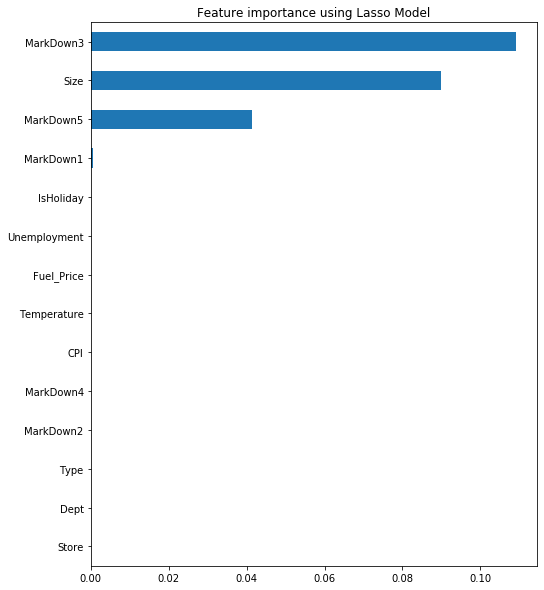

In [91]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [92]:
x=df[['MarkDown1','MarkDown3','MarkDown5']]
y=df['Weekly_Sales']
x_constant=sm.add_constant(x)

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [93]:
model=sm.OLS(y,x_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     675.4
Date:                Sun, 10 Nov 2019   Prob (F-statistic):               0.00
Time:                        09:10:48   Log-Likelihood:            -4.8258e+06
No. Observations:              421570   AIC:                         9.652e+06
Df Residuals:                  421566   BIC:                         9.652e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.527e+04     38.958    392.020      0.000    1.52e+04    1.53e+04
MarkDown1      0.1243      0.006     19.610      0.000       0.112       0.137
MarkDown3      0.1542      0.006     24.400      0.000       0.142       0.167
MarkDown5      0.1895      0.009     20.764      0.000       0.172       0.207
==============================================================================
Omnibus:                   308430.966   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8558297.485
Skew:                           3.238   Prob(JB):                         0.00
Kurtosis:                      24.102   Cond. No.                     7.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Observation:- firstly We build Model without Feature selection and then with Feature Selection but both case accuracy is very very less ,means model is not linear

# Move Toward Non Linear Model

In [94]:
df.head()

,Date,Store,Dept,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Temperature,Fuel_Price,Unemployment,IsHoliday,Weekly_Sales
0,2010-05-02,1,1,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0,24924.50
1,2010-05-02,1,2,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0,50605.27
2,2010-05-02,1,3,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0,13740.12
3,2010-05-02,1,4,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0,39954.04
4,2010-05-02,1,5,0,151315,0.0,0.0,0.0,0.0,0.0,211.096358,-14.595679,2.572,8.106,0,32229.38


# Decision Tree

In [95]:
x=df.drop(['Weekly_Sales','Date'],1)
y=df['Weekly_Sales']

In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

In [97]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [98]:
tree.score(x_test,y_test)

0.9111546020256986

In [99]:
tree.score(x_train,y_train)

1.0

In [100]:
y_pred=tree.predict(x_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)
mse=metrics.mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

2411.5715016881345
46002434.02690359
6782.509419595641


In [101]:
Model.append('Decision Tree')
Accuracy.append(tree.score(x_test,y_test))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

# Gridsearch

In [116]:
parms ={'max_depth':[1,2,3,4,5]}
from sklearn.model_selection import GridSearchCV

In [117]:
grid_search=GridSearchCV(DecisionTreeRegressor(),param_grid=parms,n_jobs=-1,verbose=0)
grid_search.fit(x_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=-1, param_grid={'max_depth': [1, 2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [118]:
grid_search.best_params_

{'max_depth': 5}

In [119]:
tree=DecisionTreeRegressor(max_depth = 5)
tree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [120]:
tree.score(x_test,y_test)

0.5427011338786959

In [121]:
tree.score(x_train,y_train)

0.5400793035202585

In [122]:
y_pred=tree.predict(x_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)
mse=metrics.mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

9503.156357777547
236780535.61545247
15387.674795610039


# Random Forest

In [123]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [124]:
RF.score(x_test,y_test)

0.9420966010365784

In [125]:
RF.score(x_train,y_train)

0.9890062327172517

In [126]:
y_pred=DT_bag.predict(x_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)
mse=metrics.mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

NameError: name 'DT_bag' is not defined

In [ ]:
Model.append('RandomForest Tree')
Accuracy.append(RF.score(x_test,y_test))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [ ]:
Model,Accuracy,RMSE

Gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parms = {'max_depth': [2, 3, 4],'bootstrap': [True, False],'max_features': ['auto', 'sqrt', 'log2', None]}

In [ ]:
grid_search=GridSearchCV(RandomForestRegressor(),param_grid=parms,n_jobs=-1,verbose=0)

In [ ]:
grid_search.fit(x_train,y_train)

In [ ]:
grid_search.best_params_

In [ ]:
RF=RandomForestRegressor(bootstrap= True,max_depth= 4,max_features= None)
RF.fit(x_train,y_train)

In [ ]:
RF.score(x_test,y_test)

In [ ]:
RF.score(x_train,y_train)

In [ ]:
y_pred=RF.predict(x_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)
mse=metrics.mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

# Ensemble Techniques

# Bagging

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

In [ ]:
DT_bag=DecisionTreeRegressor(max_depth=10,min_samples_leaf=10,min_samples_split=60)

In [ ]:
DT_bag.fit(x_train,y_train)

In [ ]:
DT_bag.score(x_test,y_test)

In [ ]:
DT_bag.score(x_train,y_train)

In [ ]:
y_pred=DT_bag.predict(x_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)
mse=metrics.mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

In [ ]:
Model.append('DT_bag Tree')
Accuracy.append(DT_bag.score(x_test,y_test))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Bagging-RandomForest

In [ ]:
RF_bag=RandomForestRegressor(n_estimators=13,random_state=0,n_jobs=-1)
RF_bag.fit(x_train,y_train)

In [ ]:
RF_bag.score(x_test,y_test)

In [ ]:
RF_bag.score(x_train,y_train)

In [ ]:
y_pred=RF_bag.predict(x_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)
mse=metrics.mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

In [ ]:
Model.append('Random_bag')
Accuracy.append(RF_bag.score(x_test,y_test))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

# Boosting

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
dt_Boost = AdaBoostRegressor(base_estimator=tree,n_estimators=10,learning_rate=0.01,random_state=1)
dt_Boost.fit(x_train,y_train)

In [ ]:
dt_Boost.score(x_test,y_test)

In [ ]:
dt_Boost.score(x_train,y_train)

In [ ]:
y_pred=dt_Boost.predict(x_test)

In [ ]:
mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)
mse=metrics.mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

In [ ]:
Model.append('DT_Boost')
Accuracy.append(dt_Boost.score(x_test,y_test))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Random Forest

In [ ]:
RF_Boost = AdaBoostRegressor(base_estimator=RF,n_estimators=10,learning_rate=0.01,random_state=1)
RF_Boost.fit(x_train,y_train)

In [ ]:
RF_Boost.score(x_test,y_test)

In [ ]:
RF_Boost.score(x_train,y_train)

In [ ]:
y_pred=rf_Boost.predict(x_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)
mse=metrics.mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

In [ ]:
Model.append('RF_Boost')
Accuracy.append(rf_Boost.score(x_test,y_test))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
Gradient_boost = GradientBoostingRegressor(n_estimators=10,learning_rate=0.01,random_state=1)
Gradient_boost.fit(x_train,y_train)

In [ ]:
y_pred=Gradient_boost.predict(x_test)

In [ ]:
mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)
mse=metrics.mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

In [ ]:
Model.append('Gradient_Boosting')
Accuracy.append(Gradient_boost.score(x_test,y_test))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

# XGBRegressor

In [ ]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(x_train,y_train, verbose=False)

In [ ]:
y_pred=xgbr.predict(x_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)
mse=metrics.mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)

In [ ]:
Model.append('XGBR')
Accuracy.append(xgbr.score(x_test,y_test))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [ ]:
final_result = pd.DataFrame({'Model':Model,'Accuracy':Accuracy,'RMSE':RMSE})
final_result

# Observation:-  DT_bag is good compared to all model